<a href="https://www.kaggle.com/code/sondosaabed/firewall-logs-univariate?scriptVersionId=187130438" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Introduction to firewall Log File


---

The firewall log file contains detailed records of network activity, capturing various fields that describe the nature of each event. Below is an explanation of the key fields present in the log file:

- **Time**: The timestamp when the event was logged.
- **Log comp**: The component of the firewall that generated the log.
- **Log subtype**: The subtype of the log event, indicating the action taken (e.g., Allowed, Blocked).
- **Username**: The username associated with the event, if applicable.
- **Firewall rule**: The ID of the firewall rule that processed the event.
- **Firewall rule name**: The name of the firewall rule that processed the event.
- **NAT rule**: The ID of the NAT rule applied to the event.
- **NAT rule name**: The name of the NAT rule applied to the event.
- **In interface**: The network interface where the traffic originated.
- **Out interface**: The network interface where the traffic was sent.
- **Src IP**: The source IP address of the traffic.
- **Dst IP**: The destination IP address of the traffic.
- **Src port**: The source port number of the traffic.
- **Dst port**: The destination port number of the traffic.
- **Protocol**: The protocol used by the traffic (e.g., TCP, UDP).
- **Rule type**: The type of rule (e.g., 1 for firewall rule).
- **Live PCAP**: Indicator for live packet capture availability.
- **Message**: Additional message or information related to the event.
- **Log occurrence**: Number of times this log entry has been logged.



## Objective:


---
Students should concentrate on exploratory and explanatory data analysis using univariate exploration of data and understand what constitutes good vs. bad data visualization. Here are some questions to guide their analysis:

**Basic Statistics:**

---



* What is the total number of log entries in the dataset?
* How many unique firewall rules are present in the dataset?
* How many unique NAT rules are present in the dataset?

**Time-Based Analysis**

---



* What is the distribution of log entries over time? (Create a histogram of log entries by time)
* Identify peak times of network activity based on the number of log entries.

**Source and Destination IP Analysis**


---


* List the top 10 most frequent source IP addresses.
* List the top 10 most frequent destination IP addresses.
* Visualize the distribution of source and destination IP addresses.

**Port Analysis**


---



* Identify the most common source and destination ports.
* Visualize the distribution of source and destination ports using bar charts.

**Protocol Analysis**

---



* What is the distribution of protocols used in the log entries?
* Visualize the protocol distribution with a pie chart or bar chart.

**Firewall and NAT Rule Analysis**

---

* Which firewall rule has the most log entries?
* Which NAT rule is applied most frequently?
* Visualize the distribution of firewall and NAT rule usage.


In [1]:
!pip install skimpy

  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.9.0
    Uninstalling typing_extensions-4.9.0:
      Successfully uninstalled typing_extensions-4.9.0
  Attempting uninstall: typeguard
    Found existing installation: typeguard 4.1.5
    Uninstalling typeguard-4.1.5:
      Successfully uninstalled typeguard-4.1.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.8.1 requires wurlitzer, which is not installed.
apache-beam 2.46.0 requires dill<0.3.2,>=0.3.1.1, but you have dill 0.3.8 which is incompatible.
apache-beam 2.46.0 requires numpy<1.25.0,>=1.14.3, but you have numpy 1.26.4 which is incompatible.
apache-beam 2.46.0 requires pyarrow<10.0.0,>=3.0.0, but you have pyarrow 16.1.0 which is incompatible.
jupyterlab 4.2.1 requires jupyter-lsp>=2.0.0, but you have jupyter-lsp 1.5.1 which is i

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from skimpy import skim

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df=pd.read_csv('/kaggle/input/firewall-logs/new_logs.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Time                200 non-null    object 
 1   Log comp            200 non-null    object 
 2   Log subtype         200 non-null    object 
 3   Username            0 non-null      float64
 4   Firewall rule       198 non-null    float64
 5   Firewall rule name  198 non-null    object 
 6   NAT rule            200 non-null    int64  
 7   NAT rule name       192 non-null    object 
 8   In interface        198 non-null    object 
 9   Out interface       196 non-null    object 
 10  Src IP              200 non-null    object 
 11  Dst IP              200 non-null    object 
 12  Src port            200 non-null    int64  
 13  Dst port            200 non-null    int64  
 14  protocol            200 non-null    object 
 15  Rule type           200 non-null    int64  
 16  Live PCA

In [6]:
skim(df)

/opt/conda/lib/python3.10/site-packages/numpy/lib/histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 200    │ │ string      │ 12    │                                                          │
│ │ Number of columns │ 20     │ │ int64       │ 5     │                                                          │
│ └───────────────────┴────────┘ │ float64     │ 3     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name       ┃ NA   ┃ NA %  ┃ mean    ┃ sd        ┃ p0   ┃ p25    ┃ p50    ┃ p75    ┃ p100   ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩  │
│ │ Username          │  200 │   100 │     nan │       nan │  nan │    nan │    nan │    nan │    nan │        │  │
│ │ Firewall rule     │    2 │     1 │   24.97 │     22.61 │    2 │      2 │     20 │     48 │     55 │ ▇ ▁▁▁▆ │  │
│ │ NAT rule          │    0 │     0 │   13.73 │     3.265 │    0 │     15 │     15 │     15 │     15 │     ▁▇ │  │
│ │ Src port          │    0 │     0 │   51730 │     11450 │    0 │  52460 │  54160 │  54610 │  65380 │ ▁  ▁▇▇ │  │
│ │ Dst port          │    0 │     0 │   250.5 │     306.7 │    0 │     53 │     80 │    443 │   3544 │   ▇    │  │
│ │ Rule type         │    0 │     0 │    0.99 │   0.09975 │    0 │      1 │      1 │      1 │      1 │      ▇ │  │
│ │ Log occurrence    │    0 │     0 │       1 │         0 │    1 │      1 │      1 │      1 │      1 │     ▇  │  │
│ │ Unnamed: 19       │  200 │   100 │     nan │       nan │  nan │    nan │    nan │    nan │    nan │        │  │
│ └───────────────────┴──────┴───────┴─────────┴───────────┴──────┴────────┴────────┴────────┴────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                        ┃ NA      ┃ NA %      ┃ words per row            ┃ total words          ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Time                               │       0 │         0 │                        2 │                  400 │  │
│ │ Log comp                           │       0 │         0 │                        2 │                  400 │  │
│ │ Log subtype                        │       0 │         0 │                        1 │                  200 │  │
│ │ Firewall rule name                 │       2 │         1 │                     0.99 │                  198 │  │
│ │ NAT rule name                      │       8 │         4 │                        3 │                  597 │  │
│ │ In interface                       │       2 │         1 │                     0.99 │                  198 │  │
│ │ Out interface                      │       4 │         2 │                     0.98 │                  196 │  │
│ │ Src IP                             │       0 │         0 │                        1 │                  200 │  │
│ │ Dst IP                             │       0 │      

- Histogram: distribution
- Boxplot: outliers
- Piechart: distribution also BarChart

In [10]:
df.sample(10)

,Time,Log comp,Log subtype,Username,Firewall rule,Firewall rule name,NAT rule,NAT rule name,In interface,Out interface,Src IP,Dst IP,Src port,Dst port,protocol,Rule type,Live PCAP,Message,Log occurrence,Unnamed: 19
48,2024-07-06 12:28:34,Firewall Rule,Allowed,NaN,2.0,LAN-2-WAN,15,Default SNAT IPv4,Port1,Port2,192.168.61.111,8.8.8.8,52902,53,UDP,1,Open PCAP,NaN,1,NaN
61,2024-07-06 12:28:22,Firewall Rule,Allowed,NaN,5.0,WebNat,10,iqrad webserver - DNAT,Port2,Port3,45.147.66.142,82.213.48.193,2752,443,TCP,1,Open PCAP,NaN,1,NaN
133,2024-07-06 12:25:51,Firewall Rule,Allowed,NaN,2.0,LAN-2-WAN,15,Default SNAT IPv4,Port1,Port2,192.168.61.233,8.8.8.8,62774,53,UDP,1,Open PCAP,NaN,1,NaN
58,2024-07-06 12:28:25,Firewall Rule,Allowed,NaN,2.0,LAN-2-WAN,15,Default SNAT IPv4,Port1,Port2,192.168.61.111,8.8.8.8,52151,53,UDP,1,Open PCAP,NaN,1,NaN
59,2024-07-06 12:28:24,Firewall Rule,Allowed,NaN,8.0,WAN-2-DNS-DNAT,9,PublicDNS - DNAT,Port2,Port3,212.14.226.13,82.213.48.195,38709,53,UDP,1,Open PCAP,NaN,1,NaN
49,2024-07-06 12:28:31,Firewall Rule,Allowed,NaN,2.0,LAN-2-WAN,15,Default SNAT IPv4,Port1,Port2,192.168.61.233,8.8.8.8,63445,53,UDP,1,Open PCAP,NaN,1,NaN
110,2024-07-06 12:25:58,Firewall Rule,Allowed,NaN,2.0,LAN-2-WAN,15,Default SNAT IPv4,Port1,Port2,192.168.61.233,8.8.8.8,58915,53,UDP,1,Open PCAP,NaN,1,NaN
66,2024-07-06 12:28:15,Firewall Rule,Allowed,NaN,2.0,LAN-2-WAN,15,Default SNAT IPv4,Port1,Port2,192.168.61.111,8.8.8.8,53790,53,UDP,1,Open PCAP,NaN,1,NaN
80,2024-07-06 12:28:06,Firewall Rule,Allowed,NaN,2.0,LAN-2-WAN,15,Default SNAT IPv4,Port1,Port2,192.168.61.233,8.8.8.8,53495,53,UDP,1,Open PCAP,NaN,1,NaN
109,2024-07-06 12:25:59,Firewall Rule,Allowed,NaN,2.0,LAN-2-WAN,15,Default SNAT IPv4,Port1,Port2,192.168.61.233,8.8.8.8,64925,53,UDP,1,Open PCAP,NaN,1,NaN


In [9]:
df.nunique()

Time                  101
Log comp                2
Log subtype             2
Username                0
Firewall rule          10
Firewall rule name     10
NAT rule                5
NAT rule name           4
In interface            3
Out interface           2
Src IP                 24
Dst IP                 58
Src port              192
Dst port                7
protocol                3
Rule type               2
Live PCAP               1
Message                 2
Log occurrence          1
Unnamed: 19             0
dtype: int64

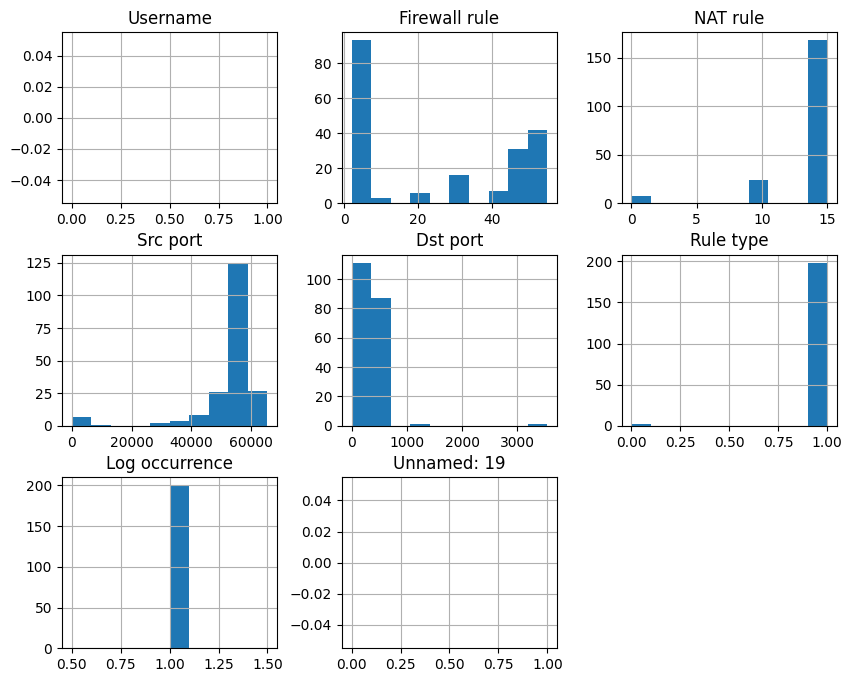

In [43]:
df.hist(figsize=[10, 8]);

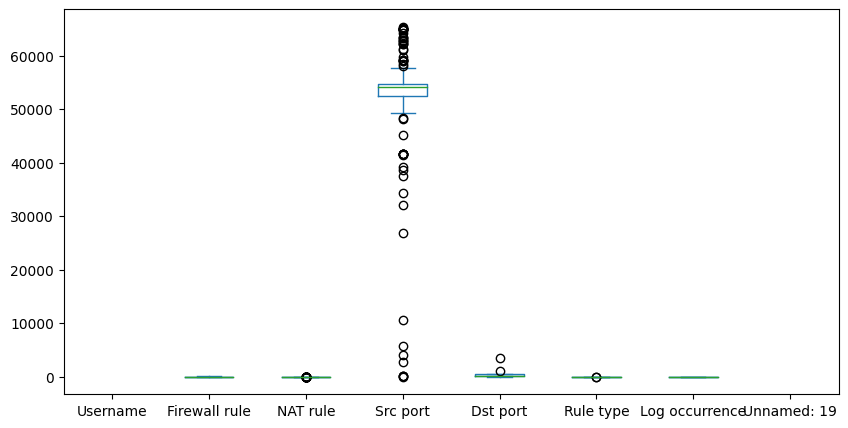

In [15]:
df.plot(kind='box', figsize=[10, 5]);

In [44]:
df['NAT rule name'] = df['NAT rule name'].astype(str)
value_counts = df['NAT rule name'].value_counts()

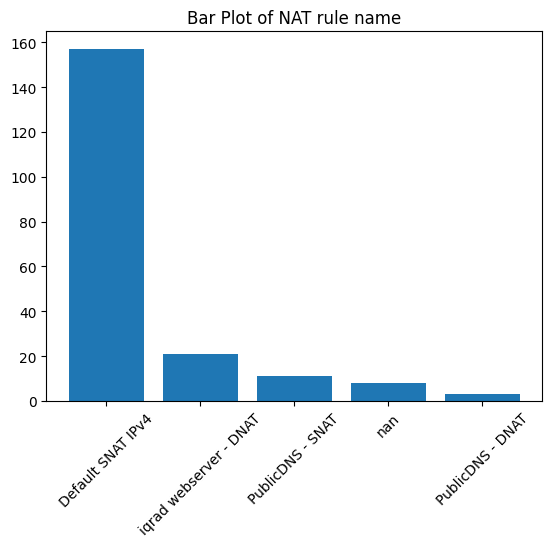

In [46]:
plt.bar(value_counts.index, value_counts.values)
plt.title('Bar Plot of NAT rule name')
plt.xticks(rotation=45);